In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('..'))
from modules import io

In [2]:
RADIUS_SMALL = 0.4
results_path = "../results"

data_key = 'TEST'

experiments = ['convnet_fc250_l10_train150k_clean',
               'convnet_fc250_l20_train150k_clean',
               "convnet_fc1000_250_l10_train150k_clean",
               "convnet_fc1000_250_l20_train150k_clean",
              
               'googlenet_train300k_clean',
               "googlenet_c30_train300k_clean",
               "googlenet_c45_train300k_clean",
               
               #"googlenet_c30_train300k_aug10_clean_small",
               #"googlenet_c30_train300k_aug10_clean_large",
               
               #"googlenet_c30_train300k_clean_point",
               #"googlenet_c30_train300k_clean_point_small",
               #"googlenet_c30_train300k_clean_point_large",
              ]

labels = ["ConvNet-1",
          "ConvNet-2",
          "ConvNet-3",
          "ConvNet-4",
          
          "GoogleNet",
          "GoogleNet-c30",
          "GoogleNet-c45",
          
          #"GoogleNet-c30-small",
          #"GoogleNet-c30-large",
          
          #"GoogleNet-c30-point",
          #"GoogleNet-c30-point-small",
          #"GoogleNet-c30-point-large"
         ]

file_labels = experiments

colors = ["#6ACC64",
          "#6ACC64",
          "#6ACC64",
          "#6ACC64",
          
          "#4878D0",
          "#4878D0", 
          "#4878D0",
         
          #"red",
          #"red",
          
          #"brown",
          #"brown",
          #"brown"
         ]

markers = ['o', '^', 'x', 's',
          
           'o', '^', 'x',
           
           #'o', '^',
           
           #'o', '^', 'x'
          ]

hatch   = ['', '/', '+', 'O',
           
           '', '/', '+',
          
           #'', '/',
           
           #'', '/', '+'
          ]

In [3]:
dataframes = []
names = []
for e in experiments:
    fn = '../config/{}.yaml'.format(e)
    config = io.load_yaml(fn)
    
    names.append(config['NAME'])
    
    data_fn = "{}/{}/{}/{}.csv".format(
        results_path, config['NAME'], data_key.lower(), data_key 
    )
    
    df = pd.read_csv(data_fn)
    
    df['code'] = df['image']+'.'+df['path_name']
    df_group = df.groupby('code').mean()
    df_group['HAUSDORFF'] = df.groupby('code').max()['HAUSDORFF']
    
    df_group['model_name'] = config['NAME']
    
    print(e, df_group.shape)
    dataframes.append(df_group)
    
data = pd.concat(dataframes,axis=0)
print(data.shape)
print(data.columns)

convnet_fc250_l10_train150k_clean (424, 7)
convnet_fc250_l20_train150k_clean (424, 7)
convnet_fc1000_250_l10_train150k_clean (424, 7)
convnet_fc1000_250_l20_train150k_clean (424, 7)
googlenet_train300k_clean (424, 7)
googlenet_c30_train300k_clean (424, 7)
googlenet_c45_train300k_clean (424, 7)
(2968, 7)
Index(['Unnamed: 0', 'ASSD', 'HAUSDORFF', 'dice', 'point', 'radius',
       'model_name'],
      dtype='object')


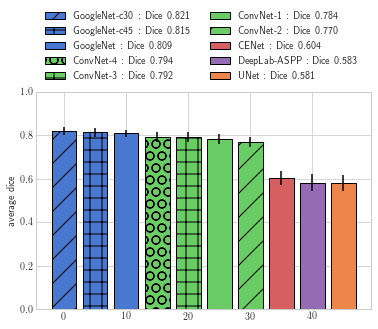

In [4]:
plt.figure()
dx = 5
width = 4

bars = []

t_user = {
    "color":"#D65F5F",
    "hatch":'',
    "dice":0.803,
    "err":0.0095,
    "label":"human : Dice 0.80",
    "x":dx
}
#bars.append(t_user)

t_user = {
    "color":"#EE854A",
    "hatch":'',
    "dice":0.581,
    "err":0.012,
    "label":"UNet : Dice 0.581",
    "x":dx
}
bars.append(t_user)

t_user = {
    "color":"#956CB4",
    "hatch":'',
    "dice":0.583,
    "err":0.013,
    "label":"DeepLab-ASPP : Dice 0.583",
    "x":dx
}
bars.append(t_user)

t_user = {
    "color":"#D65F5F",
    "hatch":'',
    "dice":0.604,
    "err":0.011,
    "label":"CENet : Dice 0.604",
    "x":dx
}
bars.append(t_user)


for i,name in enumerate(names):
    d = data.loc[data['model_name'] == name]
    
    t = {}
    t['color'] = colors[i]
    t['hatch'] = hatch[i]
    t['dice']  = np.mean(d['dice'])
    t['err']   = np.std(d['dice'])/np.sqrt(len(d['dice']))
    
    t['label'] = labels[i] + ' : Dice {0:.3f}'.format(t['dice'])
    
    t['x']     = dx
    bars.append(t)
    
bars = sorted(bars, key=lambda x: -x['dice'])

for i in range(len(bars)):
    e = bars[i]
    plt.bar(i*e['x'], height=e['dice'], width=width, color=e['color'], 
            label=e['label'], yerr=3*e['err'], hatch=e['hatch'],edgecolor='k')

    
lgd = plt.legend(bbox_to_anchor=(0., 1.01, 1., .101), loc=3, ncol=2)

plt.ylabel('average dice')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
#plt.tight_layout()
plt.ylim(0,1)
plt.savefig('../figures/dice_bar_3d.pdf', bbox_extra_artists=(lgd,), 
            bbox_inches='tight', pad_inches=0,dpi=500)

plt.show()
plt.close()

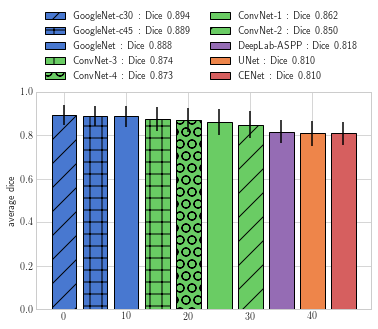

In [5]:
plt.figure()
dx = 5
width = 4

bars = []

t_user = {
    "color":"#D65F5F",
    "hatch":'',
    "dice":0.928,
    "err":0.008,
    "label":"human : Dice 0.928",
    "x":dx
}
#bars.append(t_user)

t_user = {
    "color":"#EE854A",
    "hatch":'',
    "dice":0.810,
    "err":0.019,
    "label":"UNet : Dice 0.810",
    "x":dx
}
bars.append(t_user)

t_user = {
    "color":"#956CB4",
    "hatch":'',
    "dice":0.818,
    "err":0.018,
    "label":"DeepLab-ASPP : Dice 0.818",
    "x":dx
}
bars.append(t_user)

t_user = {
    "color":"#D65F5F",
    "hatch":'',
    "dice":0.810,
    "err":0.0175,
    "label":"CENet : Dice 0.810",
    "x":dx
}
bars.append(t_user)

for i,name in enumerate(names):
    d = data.loc[data['model_name'] == name]
    d = d.loc[d['radius']>RADIUS_SMALL]
    
    t = {}
    t['color'] = colors[i]
    t['hatch'] = hatch[i]
    t['dice']  = np.mean(d['dice'])
    t['err']   = np.std(d['dice'])/np.sqrt(len(d['dice']))
    
    t['label'] = labels[i] + ' : Dice {0:.3f}'.format(t['dice'])
    
    t['x']     = dx
    bars.append(t)
    
bars = sorted(bars, key=lambda x: -x['dice'])

for i in range(len(bars)):
    e = bars[i]
    plt.bar(i*e['x'], height=e['dice'], width=width, color=e['color'], 
            label=e['label'], yerr=3*e['err'], hatch=e['hatch'],edgecolor='k')

    
lgd = plt.legend(bbox_to_anchor=(0., 1.01, 1., .101), loc=3, ncol=2)

plt.ylabel('average dice')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
#plt.tight_layout()
plt.ylim(0,1)
plt.savefig('../figures/dice_bar_large_3d.pdf', bbox_extra_artists=(lgd,), 
            bbox_inches='tight', pad_inches=0,dpi=500)

plt.show()
plt.close()

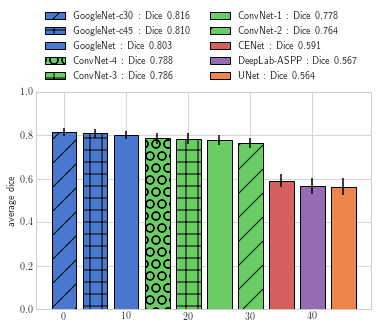

In [6]:
plt.figure()
dx = 5
width = 4

bars = []

t_user = {
    "color":"#D65F5F",
    "hatch":'',
    "dice":0.782,
    "err":0.0106,
    "label":"human : Dice 0.782",
    "x":dx
}
#bars.append(t_user)

t_user = {
    "color":"#EE854A",
    "hatch":'',
    "dice":0.564,
    "err":0.013,
    "label":"UNet : Dice 0.564",
    "x":dx
}
bars.append(t_user)

t_user = {
    "color":"#956CB4",
    "hatch":'',
    "dice":0.567,
    "err":0.012,
    "label":"DeepLab-ASPP : Dice 0.567",
    "x":dx
}
bars.append(t_user)

t_user = {
    "color":"#D65F5F",
    "hatch":'',
    "dice":0.591,
    "err":0.01,
    "label":"CENet : Dice 0.591",
    "x":dx
}
bars.append(t_user)

for i,name in enumerate(names):
    d = data.loc[data['model_name'] == name]
    d = d.loc[d['radius']<=RADIUS_SMALL]
    
    t = {}
    t['color'] = colors[i]
    t['hatch'] = hatch[i]
    t['dice']  = np.mean(d['dice'])
    t['err']   = np.std(d['dice'])/np.sqrt(len(d['dice']))
    
    t['label'] = labels[i] + ' : Dice {0:.3f}'.format(t['dice'])
    
    t['x']     = dx
    bars.append(t)
    
bars = sorted(bars, key=lambda x: -x['dice'])

for i in range(len(bars)):
    e = bars[i]
    plt.bar(i*e['x'], height=e['dice'], width=width, color=e['color'], 
            label=e['label'], yerr=3*e['err'], hatch=e['hatch'],edgecolor='k')

    
lgd = plt.legend(bbox_to_anchor=(0., 1.01, 1., .101), loc=3, ncol=2)

plt.ylabel('average dice')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
#plt.tight_layout()
plt.ylim(0,1)
plt.savefig('../figures/dice_bar_small_3d.pdf', bbox_extra_artists=(lgd,), 
            bbox_inches='tight', pad_inches=0,dpi=500)

plt.show()
plt.close()

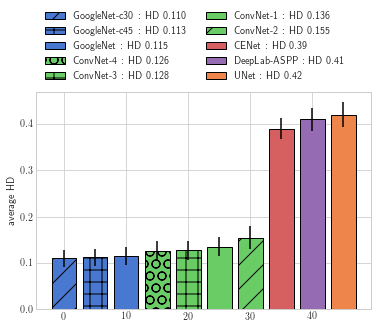

In [7]:
plt.figure()
dx = 5
width = 4

bars = []

t_user = {
    "color":"#D65F5F",
    "hatch":'',
    "HAUSDORFF":0.072,
    "err":0.0015,
    "label":"human : HD 0.072",
    "x":dx
}
#bars.append(t_user)

t_user = {
    "color":"#EE854A",
    "hatch":'',
    "HAUSDORFF":0.42,
    "err":0.009,
    "label":"UNet : HD 0.42",
    "x":dx
}
bars.append(t_user)

t_user = {
    "color":"#956CB4",
    "hatch":'',
    "HAUSDORFF":0.41,
    "err":0.008,
    "label":"DeepLab-ASPP : HD 0.41",
    "x":dx
}
bars.append(t_user)

t_user = {
    "color":"#D65F5F",
    "hatch":'',
    "HAUSDORFF":0.39,
    "err":0.0075,
    "label":"CENet : HD 0.39",
    "x":dx
}
bars.append(t_user)

for i,name in enumerate(names):
    d = data.loc[data['model_name'] == name]
    
    t = {}
    t['color'] = colors[i]
    t['hatch'] = hatch[i]
    t['HAUSDORFF']  = np.mean(d['HAUSDORFF'])
    t['err']   = np.std(d['HAUSDORFF'])/np.sqrt(len(d['HAUSDORFF']))
    
    t['label'] = labels[i] + ' : HD {0:.3f}'.format(t['HAUSDORFF'])
    
    t['x']     = dx
    bars.append(t)
    
bars = sorted(bars, key=lambda x: x['HAUSDORFF'])

for i in range(len(bars)):
    e = bars[i]
    plt.bar(i*e['x'], height=e['HAUSDORFF'], width=width, color=e['color'], 
            label=e['label'], yerr=3*e['err'], hatch=e['hatch'],edgecolor='k')

    
lgd = plt.legend(bbox_to_anchor=(0., 1.01, 1., .101), loc=3, ncol=2)

plt.ylabel('average HD')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
#plt.tight_layout()
#plt.ylim(0,1)
plt.savefig('../figures/hd_bar_3d.pdf', bbox_extra_artists=(lgd,), 
            bbox_inches='tight', pad_inches=0,dpi=500)

plt.show()
plt.close()

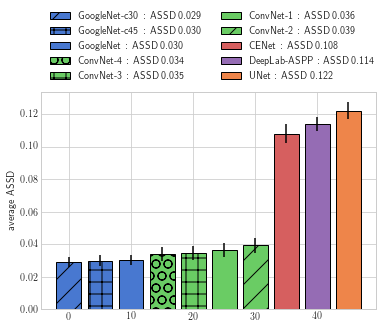

In [9]:
plt.figure()
dx = 5
width = 4

bars = []

t_user = {
    "color":"#D65F5F",
    "hatch":'',
    "ASSD":0.030,
    "err":0.0035,
    "label":"human : HD 0.030",
    "x":dx
}
#bars.append(t_user)

t_user = {
    "color":"#EE854A",
    "hatch":'',
    "ASSD":0.122,
    "err":0.00175,
    "label":"UNet : ASSD 0.122",
    "x":dx
}
bars.append(t_user)

t_user = {
    "color":"#956CB4",
    "hatch":'',
    "ASSD":0.114,
    "err":0.0015,
    "label":"DeepLab-ASPP : ASSD 0.114",
    "x":dx
}
bars.append(t_user)

t_user = {
    "color":"#D65F5F",
    "hatch":'',
    "ASSD":0.108,
    "err":0.002,
    "label":"CENet : ASSD 0.108",
    "x":dx
}
bars.append(t_user)

for i,name in enumerate(names):
    d = data.loc[data['model_name'] == name]
    
    t = {}
    t['color'] = colors[i]
    t['hatch'] = hatch[i]
    t['ASSD']  = np.mean(d['ASSD'])
    t['err']   = np.std(d['ASSD'])/np.sqrt(len(d['ASSD']))
    
    t['label'] = labels[i] + ' : ASSD {0:.3f}'.format(t['ASSD'])
    
    t['x']     = dx
    bars.append(t)
    
bars = sorted(bars, key=lambda x: x['ASSD'])

for i in range(len(bars)):
    e = bars[i]
    plt.bar(i*e['x'], height=e['ASSD'], width=width, color=e['color'], 
            label=e['label'], yerr=3*e['err'], hatch=e['hatch'],edgecolor='k')

    
lgd = plt.legend(bbox_to_anchor=(0., 1.01, 1., .101), loc=3, ncol=2)

plt.ylabel('average ASSD')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
#plt.tight_layout()
#plt.ylim(0,1)
plt.savefig('../figures/assd_bar_3d.pdf', bbox_extra_artists=(lgd,), 
            bbox_inches='tight', pad_inches=0,dpi=500)

plt.show()
plt.close()

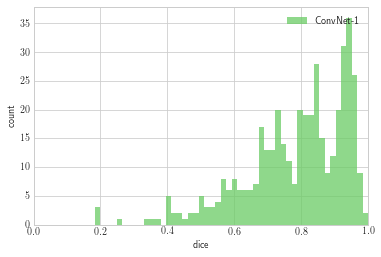

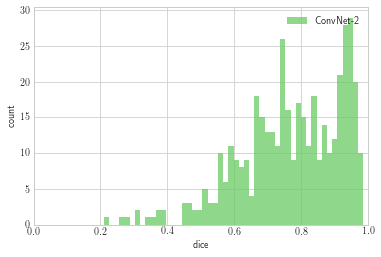

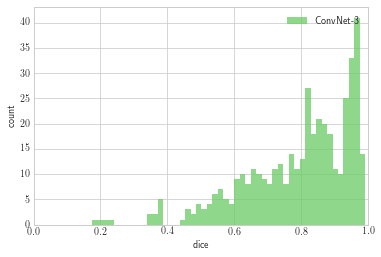

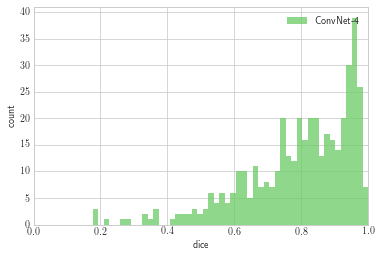

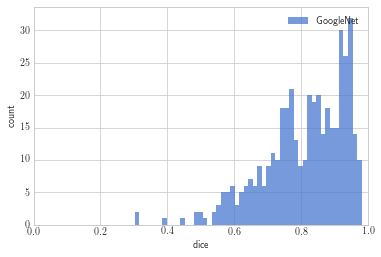

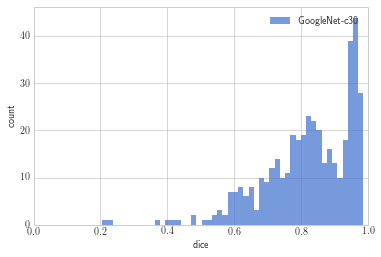

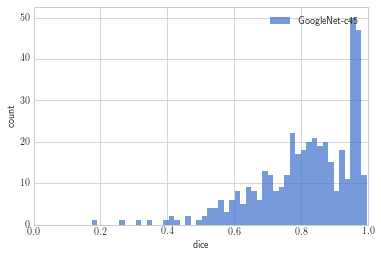

In [10]:
for i,name in enumerate(names):
    d = data.loc[data['model_name'] == name]
    
    label = labels[i]
    file_label = file_labels[i]
    color = colors[i]
    
    plt.figure()
    plt.hist(d['dice'], bins=50, alpha=0.75, color=color, label=label)

    plt.xlabel('dice')
    plt.ylabel('count')
    plt.xlim(0,1)
    plt.legend(loc='upper right')
    plt.savefig('../figures/dice_hist_{}.pdf'.format(file_label),dpi=500)
    plt.show()

In [ ]:
df = dataframes[5]
print(df.columns)
print(df['radius'].iloc[0])
small_frac = np.sum(df['radius']<=0.4)*1.0/df.shape[0]
large_frac = np.sum(df['radius']>0.4)*1.0/df.shape[0]

print("large vessel frac={}".format(large_frac))
print("small vessel frac={}".format(small_frac))

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(df['radius'], df['dice'])
plt.show()